## Group No 44

## Group Member Names:

1. BEDANTA BIKASH DUTTA (2024AA05186)
2. LELLA NIKHILESWAR (2024AA05976)
3. NIRMAL J (2024AA05189)
4. PRANAV DUBEY (2024AA05660)


# 1. Import the required libraries


In [112]:
# hub layer raises an error due to backward compatibility: https://github.com/tensorflow/tensorflow/issues/63085#issuecomment-2303851416
# The tensorflow and keras library versions were downgraded because of this.
# The second option is to use Lambda layer wrapper around hub layer but
# that stops showing params and output shape in summary
# %pip install -q tensorflow==2.15.0 keras==2.15.0 tensorflow-hub  pandas numpy matplotlib seaborn scikit-learn jinja2 tensorflow-datasets

In [ ]:
##---------Type the code below this line------------------##


import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

# Importing keras as tf_keras. In worst case we can install tf-keras package to use v2 APIs
import tensorflow.keras as tf_keras
import tensorflow_datasets as tfds
import tensorflow_hub as tf_hub
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")


# 2. Data Acquisition -- Score: 0.5 Mark

For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL


In [ ]:
##---------Type the code below this line------------------##

# IMDB Reviews dataset is selected for this assignment.
train_ds, test_ds = tfds.load(
    # Name of the dataset to load
    name="imdb_reviews",
    # By default there are 3 splits available train, test and unsupervised
    # We don't need the unsupervised set. For that purpose use split parameter
    split=["train", "test"],
)

# Convert the dataset to pandas DataFrame

train_df = tfds.as_dataframe(train_ds)
test_df = tfds.as_dataframe(test_ds)

imdb_reviews_df = pd.concat([train_df, test_df], ignore_index=True)

In [115]:
imdb_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   50000 non-null  int64 
 1   text    50000 non-null  object
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [116]:
imdb_reviews_df.head(5)

,label,text
0,0,"b""This was an absolutely terrible movie. Don't..."
1,0,b'I have been known to fall asleep during film...
2,0,b'Mann photographs the Alberta Rocky Mountains...
3,1,b'This is the kind of film for a snowy Sunday ...
4,1,"b'As others have mentioned, all the women that..."


## 2.1 Write your observations from the above.

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label.


--------------Type the answers below this line--------------

1. Size of the dataset

   50,000

2. What type of data attributes are there?

   - text: movie review (string)
   - label: sentiment of the review (1/0)

3. What are you classifying?

   Binary classification of the sentiment of a movie review. 1 if positive 0 if negative

4. Plot the distribution of the categories of the target / label.


<Figure size 750x750 with 0 Axes>

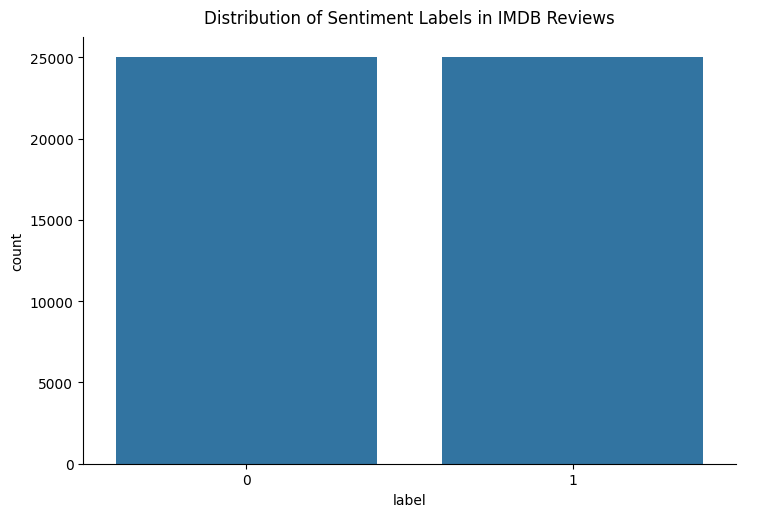

In [117]:
plt.figure(figsize=(5, 5), dpi=150)
sns.catplot(data=imdb_reviews_df, x="label", kind="count", height=5, aspect=1.5)
plt.title("Distribution of Sentiment Labels in IMDB Reviews", pad=10)
plt.show()

# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded.

This stage depends on the dataset that is used.


## 3.1 Apply pre-processing techiniques

- to remove duplicate data
- to impute or remove missing data
- to remove data inconsistencies
- Encode categorical data
- Normalize the data
- Feature Engineering
- Stop word removal, lemmatiation, stemming, vectorization

IF ANY


In [118]:
##---------Type the code below this line------------------##

# Remove duplicates
imdb_reviews_df = imdb_reviews_df.drop_duplicates()
# Remove NaN values
imdb_reviews_df = imdb_reviews_df.dropna()
# Reset index after dropping rows
imdb_reviews_df = imdb_reviews_df.reset_index(drop=True)
# The label is already in binary format, so we don't need to convert it
# To convert the text into embeddings we will use a pre trained embedding model
# from tensorflow_hub
# model_url "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2"
# Check the shape of the DataFrame
imdb_reviews_df.shape

(49582, 2)

In [119]:
# Model that generates 128-dimensional embeddings for English text
model_url = "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2"
embedding = tf_hub.KerasLayer(model_url, trainable=False, input_shape=[], dtype=tf.string, name="embedding_layer")

embedding(imdb_reviews_df["text"].to_numpy()[:1])

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[ 1.1501508 ,  0.078013  ,  0.09266154,  0.28336146,  0.00967164,
        -0.14918603,  0.3356657 , -0.3502448 , -0.00828831, -0.0187714 ,
        -0.03330697, -0.6330942 , -0.37542117, -0.27773282, -0.09661756,
         0.17255366, -0.13367656,  0.03807658, -0.27513817,  0.4947623 ,
         0.03930517,  0.13449624, -0.2707282 ,  0.01789428, -0.2410716 ,
         0.02710899,  0.10233343, -0.10662853,  0.05242986,  0.11917052,
        -0.00667078,  0.3392315 ,  0.11301497,  0.10684261,  0.39157125,
        -0.18953632, -0.17400031, -0.10644417, -0.13420047,  0.17358392,
        -0.27769503, -0.04335914, -0.03915006, -0.19834091,  0.02748548,
         0.276703  ,  0.14070286, -0.3142561 ,  0.02475694, -0.16730827,
         0.08217403, -0.09568419, -0.25733578,  0.3729147 , -0.22105993,
        -0.21443687, -0.05832561,  0.15003687, -0.16772385, -0.080281  ,
        -0.21137346, -0.0039831 ,  0.06347676,  0.06651689,  0.09252462,
 

## 3.2 Identify the target variables.

- Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

- Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.


In [120]:
##---------Type the code below this line------------------##
# Target variable is label: 0 = negative, 1 = positive
# Already binary encoded

X = imdb_reviews_df["text"].to_numpy()
y = imdb_reviews_df["label"].to_numpy()

X.shape, y.shape

((49582,), (49582,))

## 3.3 Split the data into training set and testing set


In [121]:
##---------Type the code below this line------------------##

# 70% of the data will be used for training, 15% for validation, and 15% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.shape, X_validation.shape, X_test.shape

((34707,), (7437,), (7438,))

## 3.4 Preprocessing report

Mention the method adopted and justify why the method was used

- to remove duplicate data, if present
- to impute or remove missing data, if present
- to remove data inconsistencies, if present
- to encode categorical data
- the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


##---------Type the answer below this line------------------##

- To remove duplicate data, we used the `drop_duplicates()` method from pandas.
- To remove missing data, we used the `dropna()` method from pandas.
- The data is text data, so didn't check for data inconsistencies.
- The label was already categorical (1/0), so no encoding was needed.
- For normalization an embedding model from tensorflow_hub will be used. (model_url = https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2)
- Data was split into training, validation, and testing sets using `train_test_split` from sklearn. 70% of the data was used for training, 15% for validation, and 15% for testing.


# 4. Deep Neural Network Architecture - Score: Marks


## 4.1 Design the architecture that you will be using

- Sequential Model Building with Activation for each layer.
- Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
- Use Relu Activation function in each hidden layer
- Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN.


In [122]:
##---------Type the code below this line------------------##

model = tf_keras.Sequential(
    [
        # hub layer raises an error due to backward compatibility: https://github.com/tensorflow/tensorflow/issues/63085#issuecomment-2303851416
        # The tensorflow and keras library versions were downgraded because of this.
        # The second option is to use Lambda layer wrapper around hub layer
        # but that stops showing params and output shape in summary
        tf_hub.KerasLayer(
            "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2",
            trainable=True,
            input_shape=[],
            dtype=tf.string,
            name="embedding",
        ),
        tf_keras.layers.Dense(
            32,
            activation=tf_keras.activations.relu,
            kernel_regularizer=tf_keras.regularizers.l2(0.01),
            name="hidden_1",
        ),
        tf_keras.layers.Dropout(
            0.5,
            name="dropout_1",
        ),
        tf_keras.layers.Dense(
            8,
            activation=tf_keras.activations.relu,
            kernel_regularizer=tf_keras.regularizers.l2(0.01),
            name="hidden_2",
        ),
        tf_keras.layers.Dropout(
            0.5,
            name="dropout_2",
        ),
        tf_keras.layers.Dense(
            1,
            activation=tf_keras.activations.sigmoid,
            name="output",
        ),
    ],
)

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (KerasLayer)      (None, 128)               124642688 
                                                                 
 hidden_1 (Dense)            (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 hidden_2 (Dense)            (None, 8)                 264       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 124647089 (475.49 MB)
Trainable params:

## 4.2 DNN Report

Report the following and provide justification for the same.

- Number of layers
- Number of units in each layer
- Total number of trainable parameters


In [123]:
##---------Type the answer below this line------------------##
#  Layers: Input + Embedding + 2 Dense Hidden + 1 Dense Output

# Units: 128 -> 64 -> 1
# Activation: ReLU (hidden), Sigmoid (output)

# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.


In [124]:
##---------Type the code below this line------------------##

# Using binary cross entropy loss is output is a sigmoid activation function
# Compile and train the model with SGD optimizer
model.compile(
    optimizer=tf_keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=["accuracy"],
)

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.


In [125]:
##---------Type the code below this line------------------##

# Early stop
early_stopping = tf_keras.callbacks.EarlyStopping(
    # Maximum time it is allowed val_loss to be deteriorated
    patience=4,
    # used to restore the model weights from the best value observed epoch
    restore_best_weights=True,
)


history = model.fit(
    X_train,
    y_train,
    validation_data=(X_validation, y_validation),
    epochs=20,
    batch_size=1000,
    callbacks=[early_stopping],
    verbose=1,
)


Epoch 1/20
35/35 [==============================] - 12s 320ms/step - loss: 1.3161 - accuracy: 0.4977 - val_loss: 1.2665 - val_accuracy: 0.5073
Epoch 2/20
35/35 [==============================] - 11s 313ms/step - loss: 1.2292 - accuracy: 0.5090 - val_loss: 1.1897 - val_accuracy: 0.5067
Epoch 3/20
35/35 [==============================] - 11s 320ms/step - loss: 1.1563 - accuracy: 0.5121 - val_loss: 1.1227 - val_accuracy: 0.5383
Epoch 4/20
35/35 [==============================] - 10s 301ms/step - loss: 1.0929 - accuracy: 0.5321 - val_loss: 1.0615 - val_accuracy: 0.6548
Epoch 5/20
35/35 [==============================] - 11s 305ms/step - loss: 1.0364 - accuracy: 0.5441 - val_loss: 1.0038 - val_accuracy: 0.6958
Epoch 6/20
35/35 [==============================] - 11s 325ms/step - loss: 0.9863 - accuracy: 0.5535 - val_loss: 0.9556 - val_accuracy: 0.7102
Epoch 7/20
35/35 [==============================] - 11s 318ms/step - loss: 0.9408 - accuracy: 0.5736 - val_loss: 0.9125 - val_accuracy: 0.7289

Justify your choice of optimizers and regulizations used and the hyperparameters tuned


##---------Type the answers below this line------------------##

**SGD**: Stochastic Gradient Descent is used as suggested in the assignment. A batch size of 1000 is used to speed up each epoch which getting a descent accuracy on first epoch itself.

**Learning Rate**: A learning rate of 0.01 is used to ensure that the model converges without overshooting the minimum.

**Momentum**: A momentum of 0.9 is used to help the model converge faster and avoid local minima.

**L2 Regularization**: L2 regularization is used to prevent overfitting by penalizing large weights. A value of 0.01 is used for the regularization strength.

**Dropout**: Dropout is used to prevent overfitting by randomly dropping out 50% of the neurons in the hidden layers during training. This helps the model generalize better to unseen data.

**Early Stopping**: Early stopping is used to prevent overfitting by stopping the training process when the validation loss does not improve for 4 consecutive epochs. This helps to save time and resources by not training the model unnecessarily.


# 6. Test the model - 0.5 marks


In [126]:
##---------Type the code below this line------------------##

X_sample = X_test[:5]
y_prob_sample = model.predict(X_sample).astype(int).flatten()
y_pred_sample = (y_prob_sample > 0.5).astype(int).flatten()
y_true_sample = y_test[:5]

sample = pd.DataFrame(
    {
        "Text": X_sample,
        "True Label": y_true_sample,
        "Predicted Probability": y_prob_sample,
        "Predicted Label": y_pred_sample,
    },
)

sample.head(5)

1/1 [==============================] - 0s 119ms/step


,Text,True Label,Predicted Probability,Predicted Label
0,"b""If you like who-dun-its, you will like this ...",1,0,0
1,b'This film was slow but tedious and the actin...,0,0,0
2,b'House of Games is spell binding. It\'s so ni...,1,0,0
3,"b""What a load of Leftist Hollywood bilge. This...",0,0,0
4,"b""A movie about a French girl who gets raped b...",0,0,0


In [127]:
sample.iloc[0].to_dict()

{'Text': b"If you like who-dun-its, you will like this film, considered the best Italian detective story (giallo), Fulci has done.<br /><br />It's not Mickey Spillane for sure. There are scenes designed to disturb anyone.<br /><br />Many would be offended by a local beauty trying to seduce a 12-year-old boy. She was joking, but she was naked nonetheless, and he would have jumped at the chance to jump her bones. She also tries to tempt the local priest.<br /><br />Young boys are turning up missing, and there are several interesting suspects. You have to watch carefully to discover the killer. Can you? Don't jump on the first guy, it's way too early, and he is too obvious.<br /><br />Anyone familiar with Fulci will be able to guess the killer, who died a violent death at the end. What crazy reasoning he had.",
 'True Label': 1,
 'Predicted Probability': 0,
 'Predicted Label': 0}

# 7. Intermediate result - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


## 7.1. Plot the training and validation accuracy history


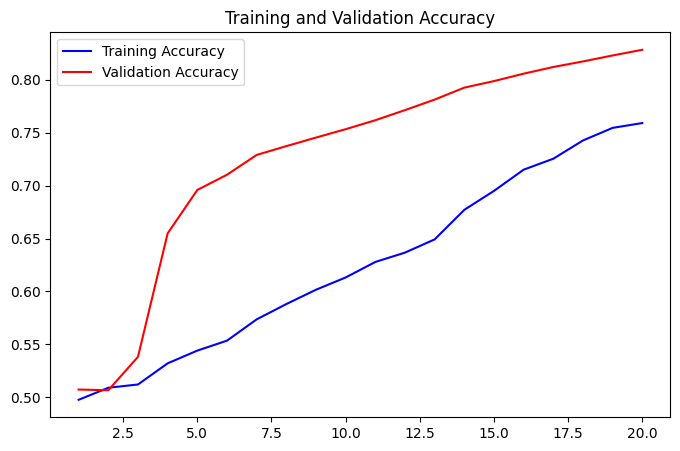

In [128]:
##---------Type the code below this line------------------##

train_accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]

plt.figure(figsize=(8, 5), dpi=100)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label="Training Accuracy", color="b")
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label="Validation Accuracy", color="r")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.title("Training and Validation Accuracy")

plt.show()

## 7.2. Plot the training and validation loss history


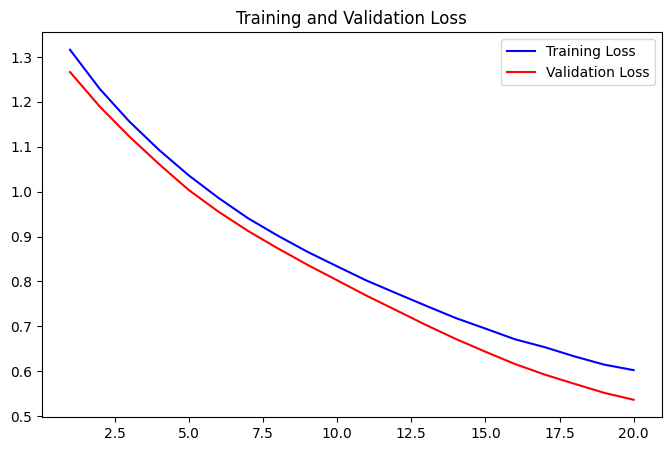

In [129]:
train_loss = history.history["loss"]
validation_loss = history.history["val_loss"]

plt.figure(figsize=(8, 5), dpi=100)
plt.plot(range(1, len(train_loss) + 1), train_loss, label="Training Loss", color="b")
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label="Validation Loss", color="r")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.title("Training and Validation Loss")

plt.show()

## 7.3. Report the testing accuracy and loss


In [130]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Test Loss: 0.5398, Test Accuracy: 0.8237


## 7.4. Show Confusion Matrix for testing dataset.


233/233 [==============================] - 13s 58ms/step


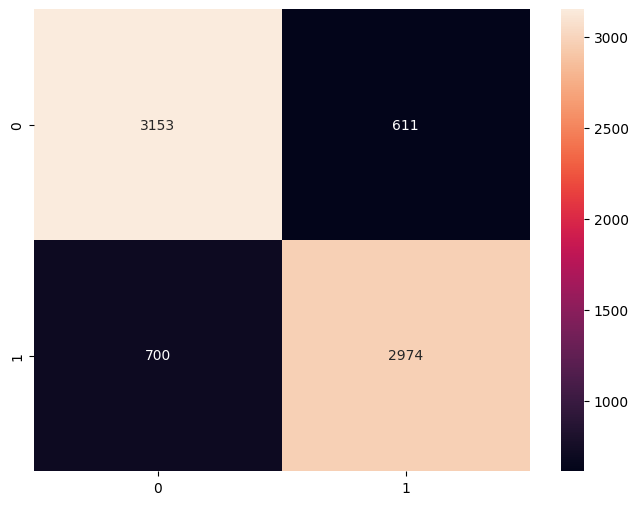

In [131]:
y_prob = model.predict(X_test).flatten()
y_pred = (y_prob > 0.5).astype(int)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(8, 6), dpi=100)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

## 7.5. Report values for performance study metrics like accuracy, precision, recall, F1 Score


In [ ]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1_score_ = f1_score(y_true=y_test, y_pred=y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score_:.4f}")

Accuracy: 0.8237
Precision: 0.8296
Recall: 0.8095
F1 Score: 0.8194


# 8. Model architecture - Score: 1 mark

Modify the architecture designed in section 4.1

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)


## 8.1. Decrease one layer


In [133]:
##---------Type the code below this line------------------##

model_one_layer_less = tf_keras.Sequential(
    [
        # hub layer raises an error due to backward compatibility: https://github.com/tensorflow/tensorflow/issues/63085#issuecomment-2303851416
        # The tensorflow and keras library versions were downgraded because of this.
        # The second option is to use Lambda layer wrapper around hub layer
        # but that stops showing params and output shape in summary
        tf_hub.KerasLayer(
            "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2",
            trainable=True,
            input_shape=[],
            dtype=tf.string,
            name="embedding",
        ),
        tf_keras.layers.Dense(
            32,
            activation=tf_keras.activations.relu,
            kernel_regularizer=tf_keras.regularizers.l2(0.01),
            name="hidden_1",
        ),
        tf_keras.layers.Dropout(
            0.5,
            name="dropout_1",
        ),
        tf_keras.layers.Dense(
            1,
            activation=tf_keras.activations.sigmoid,
            name="output",
        ),
    ],
)

model_one_layer_less.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (KerasLayer)      (None, 128)               124642688 
                                                                 
 hidden_1 (Dense)            (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 124646849 (475.49 MB)
Trainable params: 124646849 (475.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [134]:
model_one_layer_less.compile(
    optimizer=tf_keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=["accuracy"],
)

In [135]:
##---------Type the code below this line------------------##

# Early stop
early_stopping = tf_keras.callbacks.EarlyStopping(
    # Maximum time it is allowed val_loss to be deteriorated
    patience=4,
    # used to restore the model weights from the best value observed epoch
    restore_best_weights=True,
)


history_one_layer_less = model_one_layer_less.fit(
    X_train,
    y_train,
    validation_data=(X_validation, y_validation),
    epochs=20,
    batch_size=1000,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/20
35/35 [==============================] - 12s 335ms/step - loss: 1.1902 - accuracy: 0.5286 - val_loss: 1.1290 - val_accuracy: 0.6230
Epoch 2/20
35/35 [==============================] - 11s 325ms/step - loss: 1.0953 - accuracy: 0.6165 - val_loss: 1.0461 - val_accuracy: 0.6893
Epoch 3/20
35/35 [==============================] - 12s 331ms/step - loss: 1.0193 - accuracy: 0.6430 - val_loss: 0.9714 - val_accuracy: 0.7073
Epoch 4/20
35/35 [==============================] - 328s 10s/step - loss: 0.9516 - accuracy: 0.6722 - val_loss: 0.9035 - val_accuracy: 0.7288
Epoch 5/20
35/35 [==============================] - 9s 271ms/step - loss: 0.8887 - accuracy: 0.6967 - val_loss: 0.8418 - val_accuracy: 0.7451
Epoch 6/20
35/35 [==============================] - 12s 335ms/step - loss: 0.8323 - accuracy: 0.7218 - val_loss: 0.7863 - val_accuracy: 0.7624
Epoch 7/20
35/35 [==============================] - 12s 329ms/step - loss: 0.7820 - accuracy: 0.7396 - val_loss: 0.7378 - val_accuracy: 0.7779
E

## 8.2. Increase one layer


In [136]:
##---------Type the code below this line------------------##

model_one_layer_more = tf_keras.Sequential(
    [
        # hub layer raises an error due to backward compatibility: https://github.com/tensorflow/tensorflow/issues/63085#issuecomment-2303851416
        # The tensorflow and keras library versions were downgraded because of this.
        # The second option is to use Lambda layer wrapper around hub layer
        # but that stops showing params and output shape in summary
        tf_hub.KerasLayer(
            "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2",
            trainable=True,
            input_shape=[],
            dtype=tf.string,
            name="embedding",
        ),
        tf_keras.layers.Dense(
            32,
            activation=tf_keras.activations.relu,
            kernel_regularizer=tf_keras.regularizers.l2(0.01),
            name="hidden_1",
        ),
        tf_keras.layers.Dropout(
            0.5,
            name="dropout_1",
        ),
        tf_keras.layers.Dense(
            16,
            activation=tf_keras.activations.relu,
            kernel_regularizer=tf_keras.regularizers.l2(0.01),
            name="hidden_2",
        ),
        tf_keras.layers.Dropout(
            0.5,
            name="dropout_2",
        ),
        tf_keras.layers.Dense(
            8,
            activation=tf_keras.activations.relu,
            kernel_regularizer=tf_keras.regularizers.l2(0.01),
            name="hidden_3",
        ),
        tf_keras.layers.Dropout(
            0.5,
            name="dropout_3",
        ),
        tf_keras.layers.Dense(
            1,
            activation=tf_keras.activations.sigmoid,
            name="output",
        ),
    ],
)

model_one_layer_more.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (KerasLayer)      (None, 128)               124642688 
                                                                 
 hidden_1 (Dense)            (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 hidden_2 (Dense)            (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 hidden_3 (Dense)            (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)               

In [137]:
model_one_layer_more.compile(
    optimizer=tf_keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=["accuracy"],
)

In [138]:
##---------Type the code below this line------------------##

# Early stop
early_stopping = tf_keras.callbacks.EarlyStopping(
    # Maximum time it is allowed val_loss to be deteriorated
    patience=4,
    # used to restore the model weights from the best value observed epoch
    restore_best_weights=True,
)


history_one_layer_more = model_one_layer_more.fit(
    X_train,
    y_train,
    validation_data=(X_validation, y_validation),
    epochs=20,
    batch_size=1000,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/20
35/35 [==============================] - 13s 339ms/step - loss: 1.4934 - accuracy: 0.5171 - val_loss: 1.4351 - val_accuracy: 0.5002
Epoch 2/20
35/35 [==============================] - 11s 324ms/step - loss: 1.3835 - accuracy: 0.5435 - val_loss: 1.3356 - val_accuracy: 0.5233
Epoch 3/20
35/35 [==============================] - 11s 318ms/step - loss: 1.2900 - accuracy: 0.5544 - val_loss: 1.2492 - val_accuracy: 0.5522
Epoch 4/20
35/35 [==============================] - 10s 293ms/step - loss: 1.2095 - accuracy: 0.5648 - val_loss: 1.1741 - val_accuracy: 0.5907
Epoch 5/20
35/35 [==============================] - 10s 296ms/step - loss: 1.1394 - accuracy: 0.5699 - val_loss: 1.1086 - val_accuracy: 0.6203
Epoch 6/20
35/35 [==============================] - 10s 289ms/step - loss: 1.0782 - accuracy: 0.5806 - val_loss: 1.0504 - val_accuracy: 0.6480
Epoch 7/20
35/35 [==============================] - 10s 299ms/step - loss: 1.0255 - accuracy: 0.5902 - val_loss: 0.9996 - val_accuracy: 0.6755

## 8.3. Plot the comparison of the training and validation accuracy of the three architectures (4.1, 8.1 and 8.2)


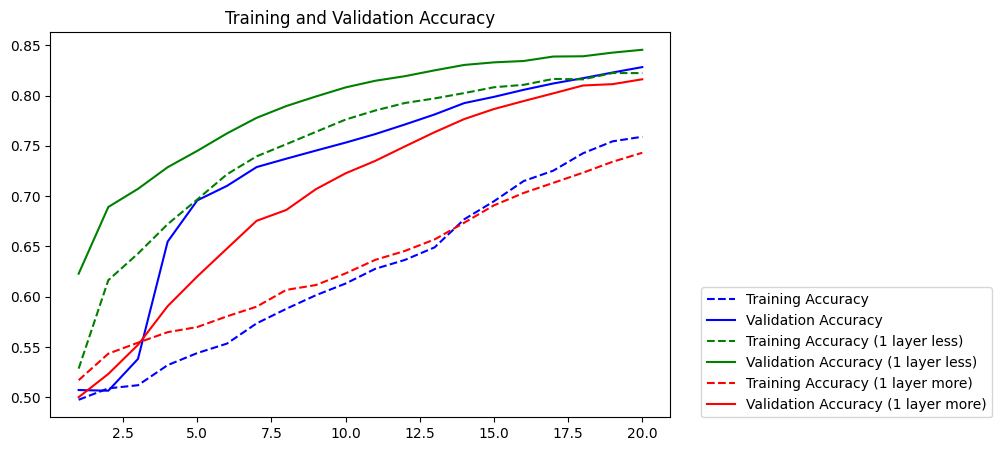

In [ ]:
##---------Type the code below this line------------------##

train_accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]

train_accuracy_one_layer_less = history_one_layer_less.history["accuracy"]
validation_accuracy_one_layer_less = history_one_layer_less.history["val_accuracy"]

train_accuracy_one_layer_more = history_one_layer_more.history["accuracy"]
validation_accuracy_one_layer_more = history_one_layer_more.history["val_accuracy"]


plt.figure(figsize=(8, 5), dpi=100)

# Use different colors and styles for each model
# Use dashed lines for training accuracy and solid lines for validation accuracy
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, "b--", label="Training Accuracy")
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, "b", label="Validation Accuracy")

plt.plot(
    range(1, len(train_accuracy_one_layer_less) + 1),
    train_accuracy_one_layer_less,
    "g--",
    label="Training Accuracy (1 layer less)",
)
plt.plot(
    range(1, len(validation_accuracy_one_layer_less) + 1),
    validation_accuracy_one_layer_less,
    "g",
    label="Validation Accuracy (1 layer less)",
)

plt.plot(
    range(1, len(train_accuracy_one_layer_more) + 1),
    train_accuracy_one_layer_more,
    "r--",
    label="Training Accuracy (1 layer more)",
)
plt.plot(
    range(1, len(validation_accuracy_one_layer_more) + 1),
    validation_accuracy_one_layer_more,
    "r",
    label="Validation Accuracy (1 layer more)",
)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend(loc=(1.05, 0))
plt.title("Training and Validation Accuracy")

plt.show()

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)


## 9.1. Dropout of ratio 0.25


In [140]:
##---------Type the code below this line------------------##

model_dropout = tf_keras.Sequential(
    [
        # hub layer raises an error due to backward compatibility: https://github.com/tensorflow/tensorflow/issues/63085#issuecomment-2303851416
        # The tensorflow and keras library versions were downgraded because of this.
        # The second option is to use Lambda layer wrapper around hub layer
        # but that stops showing params and output shape in summary
        tf_hub.KerasLayer(
            "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2",
            trainable=True,
            input_shape=[],
            dtype=tf.string,
            name="embedding",
        ),
        tf_keras.layers.Dense(
            32,
            activation=tf_keras.activations.relu,
            kernel_regularizer=tf_keras.regularizers.l2(0.01),
            name="hidden_1",
        ),
        tf_keras.layers.Dropout(
            0.25,
            name="dropout_1",
        ),
        tf_keras.layers.Dense(
            8,
            activation=tf_keras.activations.relu,
            kernel_regularizer=tf_keras.regularizers.l2(0.01),
            name="hidden_2",
        ),
        tf_keras.layers.Dropout(
            0.25,
            name="dropout_2",
        ),
        tf_keras.layers.Dense(
            1,
            activation=tf_keras.activations.sigmoid,
            name="output",
        ),
    ],
)

model_dropout.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (KerasLayer)      (None, 128)               124642688 
                                                                 
 hidden_1 (Dense)            (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 hidden_2 (Dense)            (None, 8)                 264       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 124647089 (475.49 MB)
Trainable params:

In [141]:
##---------Type the code below this line------------------##

# Using binary cross entropy loss is output is a sigmoid activation function
# Compile and train the model with SGD optimizer
model_dropout.compile(
    optimizer=tf_keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=["accuracy"],
)

In [142]:
##---------Type the code below this line------------------##

# Early stop
early_stopping = tf_keras.callbacks.EarlyStopping(
    # Maximum time it is allowed val_loss to be deteriorated
    patience=4,
    # used to restore the model weights from the best value observed epoch
    restore_best_weights=True,
)


history_dropout = model_dropout.fit(
    X_train,
    y_train,
    validation_data=(X_validation, y_validation),
    epochs=20,
    batch_size=1000,
    callbacks=[early_stopping],
    verbose=1,
)


Epoch 1/20
35/35 [==============================] - 12s 342ms/step - loss: 1.3035 - accuracy: 0.5206 - val_loss: 1.2499 - val_accuracy: 0.6231
Epoch 2/20
35/35 [==============================] - 10s 295ms/step - loss: 1.2111 - accuracy: 0.5771 - val_loss: 1.1582 - val_accuracy: 0.6781
Epoch 3/20
35/35 [==============================] - 10s 285ms/step - loss: 1.1254 - accuracy: 0.6175 - val_loss: 1.0709 - val_accuracy: 0.7112
Epoch 4/20
35/35 [==============================] - 10s 276ms/step - loss: 1.0469 - accuracy: 0.6457 - val_loss: 0.9894 - val_accuracy: 0.7280
Epoch 5/20
35/35 [==============================] - 9s 270ms/step - loss: 0.9713 - accuracy: 0.6810 - val_loss: 0.9126 - val_accuracy: 0.7490
Epoch 6/20
35/35 [==============================] - 10s 283ms/step - loss: 0.9017 - accuracy: 0.7056 - val_loss: 0.8407 - val_accuracy: 0.7729
Epoch 7/20
35/35 [==============================] - 10s 296ms/step - loss: 0.8398 - accuracy: 0.7343 - val_loss: 0.7777 - val_accuracy: 0.7937


## 9.2 Dropout of ratio 0.25 with L2 regularizer with factor 1e−04.


In [143]:
##---------Type the code below this line------------------##

model_dropout_and_regularization = tf_keras.Sequential(
    [
        # hub layer raises an error due to backward compatibility: https://github.com/tensorflow/tensorflow/issues/63085#issuecomment-2303851416
        # The tensorflow and keras library versions were downgraded because of this.
        # The second option is to use Lambda layer wrapper around hub layer
        # but that stops showing params and output shape in summary
        tf_hub.KerasLayer(
            "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2",
            trainable=True,
            input_shape=[],
            dtype=tf.string,
            name="embedding",
        ),
        tf_keras.layers.Dense(
            32,
            activation=tf_keras.activations.relu,
            kernel_regularizer=tf_keras.regularizers.l2(0.0001),
            name="hidden_1",
        ),
        tf_keras.layers.Dropout(
            0.25,
            name="dropout_1",
        ),
        tf_keras.layers.Dense(
            8,
            activation=tf_keras.activations.relu,
            kernel_regularizer=tf_keras.regularizers.l2(0.0001),
            name="hidden_2",
        ),
        tf_keras.layers.Dropout(
            0.25,
            name="dropout_2",
        ),
        tf_keras.layers.Dense(
            1,
            activation=tf_keras.activations.sigmoid,
            name="output",
        ),
    ],
)

model_dropout_and_regularization.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (KerasLayer)      (None, 128)               124642688 
                                                                 
 hidden_1 (Dense)            (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 hidden_2 (Dense)            (None, 8)                 264       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 124647089 (475.49 MB)
Trainable params:

In [144]:
##---------Type the code below this line------------------##

# Using binary cross entropy loss is output is a sigmoid activation function
# Compile and train the model with SGD optimizer
model_dropout_and_regularization.compile(
    optimizer=tf_keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=["accuracy"],
)

In [145]:
##---------Type the code below this line------------------##

# Early stop
early_stopping = tf_keras.callbacks.EarlyStopping(
    # Maximum time it is allowed val_loss to be deteriorated
    patience=4,
    # used to restore the model weights from the best value observed epoch
    restore_best_weights=True,
)


history_dropout_and_regularization = model_dropout_and_regularization.fit(
    X_train,
    y_train,
    validation_data=(X_validation, y_validation),
    epochs=20,
    batch_size=1000,
    callbacks=[early_stopping],
    verbose=1,
)


Epoch 1/20
35/35 [==============================] - 13s 350ms/step - loss: 0.7040 - accuracy: 0.5043 - val_loss: 0.6919 - val_accuracy: 0.5656
Epoch 2/20
35/35 [==============================] - 12s 336ms/step - loss: 0.6887 - accuracy: 0.5618 - val_loss: 0.6682 - val_accuracy: 0.6665
Epoch 3/20
35/35 [==============================] - 11s 310ms/step - loss: 0.6697 - accuracy: 0.6087 - val_loss: 0.6398 - val_accuracy: 0.7043
Epoch 4/20
35/35 [==============================] - 10s 301ms/step - loss: 0.6464 - accuracy: 0.6409 - val_loss: 0.6074 - val_accuracy: 0.7327
Epoch 5/20
35/35 [==============================] - 11s 315ms/step - loss: 0.6200 - accuracy: 0.6702 - val_loss: 0.5734 - val_accuracy: 0.7562
Epoch 6/20
35/35 [==============================] - 10s 300ms/step - loss: 0.5932 - accuracy: 0.7001 - val_loss: 0.5408 - val_accuracy: 0.7736
Epoch 7/20
35/35 [==============================] - 11s 308ms/step - loss: 0.5667 - accuracy: 0.7212 - val_loss: 0.5091 - val_accuracy: 0.7929

## 9.3. Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)


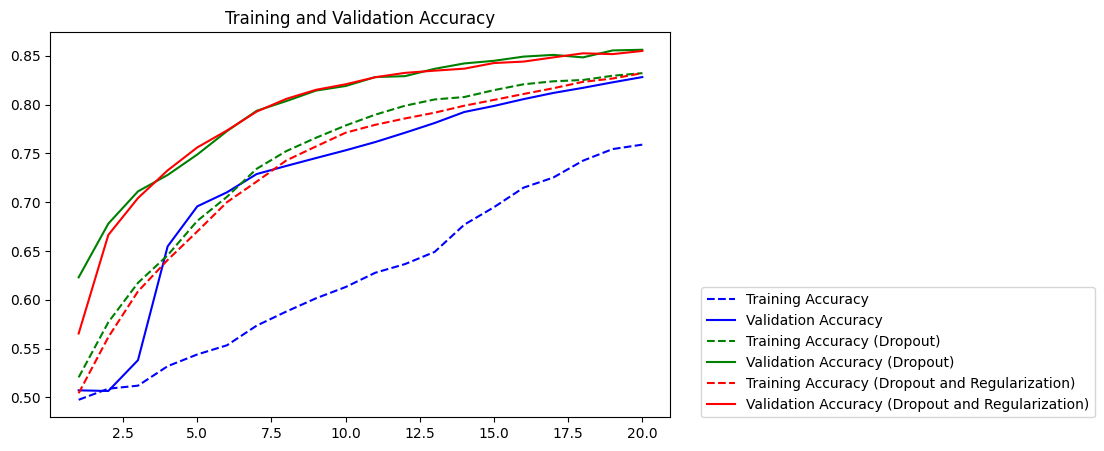

In [ ]:
##---------Type the code below this line------------------##

train_accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]

train_accuracy_dropout = history_dropout.history["accuracy"]
validation_accuracy_dropout = history_dropout.history["val_accuracy"]

train_accuracy_dropout_and_regularization = history_dropout_and_regularization.history["accuracy"]
validation_accuracy_dropout_and_regularization = history_dropout_and_regularization.history["val_accuracy"]


plt.figure(figsize=(8, 5), dpi=100)

# Use different colors and styles for each model
# Use dashed lines for training accuracy and solid lines for validation accuracy
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, "b--", label="Training Accuracy")
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, "b", label="Validation Accuracy")

plt.plot(range(1, len(train_accuracy_dropout) + 1), train_accuracy_dropout, "g--", label="Training Accuracy (Dropout)")
plt.plot(
    range(1, len(validation_accuracy_dropout) + 1),
    validation_accuracy_dropout,
    "g",
    label="Validation Accuracy (Dropout)",
)

plt.plot(
    range(1, len(train_accuracy_dropout_and_regularization) + 1),
    train_accuracy_dropout_and_regularization,
    "r--",
    label="Training Accuracy (Dropout and Regularization)",
)
plt.plot(
    range(1, len(validation_accuracy_dropout_and_regularization) + 1),
    validation_accuracy_dropout_and_regularization,
    "r",
    label="Validation Accuracy (Dropout and Regularization)",
)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend(loc=(1.05, 0))
plt.title("Training and Validation Accuracy")

plt.show()

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (4.1, 10.1 and 10.2)


## 10.1. RMSProp with your choice of hyper parameters


In [147]:
##---------Type the code below this line------------------##

model_rms_prop = tf_keras.Sequential(
    [
        # hub layer raises an error due to backward compatibility: https://github.com/tensorflow/tensorflow/issues/63085#issuecomment-2303851416
        # The tensorflow and keras library versions were downgraded because of this.
        # The second option is to use Lambda layer wrapper around hub layer
        # but that stops showing params and output shape in summary
        tf_hub.KerasLayer(
            "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2",
            trainable=True,
            input_shape=[],
            dtype=tf.string,
            name="embedding",
        ),
        tf_keras.layers.Dense(
            32,
            activation=tf_keras.activations.relu,
            kernel_regularizer=tf_keras.regularizers.l2(0.01),
            name="hidden_1",
        ),
        tf_keras.layers.Dropout(
            0.5,
            name="dropout_1",
        ),
        tf_keras.layers.Dense(
            8,
            activation=tf_keras.activations.relu,
            kernel_regularizer=tf_keras.regularizers.l2(0.01),
            name="hidden_2",
        ),
        tf_keras.layers.Dropout(
            0.5,
            name="dropout_2",
        ),
        tf_keras.layers.Dense(
            1,
            activation=tf_keras.activations.sigmoid,
            name="output",
        ),
    ],
)

model_rms_prop.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (KerasLayer)      (None, 128)               124642688 
                                                                 
 hidden_1 (Dense)            (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 hidden_2 (Dense)            (None, 8)                 264       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 124647089 (475.49 MB)
Trainable params:

In [148]:
model_rms_prop.compile(
    optimizer=tf_keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.9, rho=0.9, epsilon=1e-07),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=["accuracy"],
)

In [149]:
##---------Type the code below this line------------------##

# Early stop
early_stopping = tf_keras.callbacks.EarlyStopping(
    # Maximum time it is allowed val_loss to be deteriorated
    patience=4,
    # used to restore the model weights from the best value observed epoch
    restore_best_weights=True,
)


history_rms_prop = model_rms_prop.fit(
    X_train,
    y_train,
    validation_data=(X_validation, y_validation),
    epochs=20,
    batch_size=1000,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/20
35/35 [==============================] - 18s 474ms/step - loss: 0.8216 - accuracy: 0.5324 - val_loss: 0.7025 - val_accuracy: 0.6122
Epoch 2/20
35/35 [==============================] - 17s 479ms/step - loss: 0.6391 - accuracy: 0.7067 - val_loss: 0.4626 - val_accuracy: 0.8296
Epoch 3/20
35/35 [==============================] - 16s 454ms/step - loss: 0.5092 - accuracy: 0.7933 - val_loss: 0.4207 - val_accuracy: 0.8475
Epoch 4/20
35/35 [==============================] - 16s 464ms/step - loss: 0.4678 - accuracy: 0.8194 - val_loss: 0.3557 - val_accuracy: 0.8827
Epoch 5/20
35/35 [==============================] - 16s 463ms/step - loss: 0.4598 - accuracy: 0.8270 - val_loss: 0.3755 - val_accuracy: 0.8896
Epoch 6/20
35/35 [==============================] - 16s 470ms/step - loss: 0.4476 - accuracy: 0.8354 - val_loss: 0.4687 - val_accuracy: 0.8456
Epoch 7/20
35/35 [==============================] - 16s 456ms/step - loss: 0.4312 - accuracy: 0.8436 - val_loss: 0.3346 - val_accuracy: 0.8899

## 10.2. Adam with your choice of hyper parameters


In [150]:
##---------Type the code below this line------------------##

model_adam = tf_keras.Sequential(
    [
        # hub layer raises an error due to backward compatibility: https://github.com/tensorflow/tensorflow/issues/63085#issuecomment-2303851416
        # The tensorflow and keras library versions were downgraded because of this.
        # The second option is to use Lambda layer wrapper around hub layer
        # but that stops showing params and output shape in summary
        tf_hub.KerasLayer(
            "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2",
            trainable=True,
            input_shape=[],
            dtype=tf.string,
            name="embedding",
        ),
        tf_keras.layers.Dense(
            32,
            activation=tf_keras.activations.relu,
            kernel_regularizer=tf_keras.regularizers.l2(0.01),
            name="hidden_1",
        ),
        tf_keras.layers.Dropout(
            0.5,
            name="dropout_1",
        ),
        tf_keras.layers.Dense(
            8,
            activation=tf_keras.activations.relu,
            kernel_regularizer=tf_keras.regularizers.l2(0.01),
            name="hidden_2",
        ),
        tf_keras.layers.Dropout(
            0.5,
            name="dropout_2",
        ),
        tf_keras.layers.Dense(
            1,
            activation=tf_keras.activations.sigmoid,
            name="output",
        ),
    ],
)

model_adam.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (KerasLayer)      (None, 128)               124642688 
                                                                 
 hidden_1 (Dense)            (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 hidden_2 (Dense)            (None, 8)                 264       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 124647089 (475.49 MB)
Trainable params:

In [151]:
model_adam.compile(
    optimizer=tf_keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=True),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=["accuracy"],
)

In [152]:
##---------Type the code below this line------------------##

# Early stop
early_stopping = tf_keras.callbacks.EarlyStopping(
    # Maximum time it is allowed val_loss to be deteriorated
    patience=4,
    # used to restore the model weights from the best value observed epoch
    restore_best_weights=True,
)


history_adam = model_adam.fit(
    X_train,
    y_train,
    validation_data=(X_validation, y_validation),
    epochs=20,
    batch_size=1000,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/20
35/35 [==============================] - 22s 593ms/step - loss: 0.7612 - accuracy: 0.6898 - val_loss: 0.4036 - val_accuracy: 0.8854
Epoch 2/20
35/35 [==============================] - 18s 516ms/step - loss: 0.3673 - accuracy: 0.8988 - val_loss: 0.2971 - val_accuracy: 0.8965
Epoch 3/20
35/35 [==============================] - 19s 555ms/step - loss: 0.2468 - accuracy: 0.9457 - val_loss: 0.2940 - val_accuracy: 0.9044
Epoch 4/20
35/35 [==============================] - 19s 540ms/step - loss: 0.1903 - accuracy: 0.9646 - val_loss: 0.3493 - val_accuracy: 0.9021
Epoch 5/20
35/35 [==============================] - 19s 536ms/step - loss: 0.1580 - accuracy: 0.9726 - val_loss: 0.3847 - val_accuracy: 0.8970
Epoch 6/20
35/35 [==============================] - 22s 618ms/step - loss: 0.1347 - accuracy: 0.9767 - val_loss: 0.4120 - val_accuracy: 0.8977
Epoch 7/20
35/35 [==============================] - 19s 556ms/step - loss: 0.1201 - accuracy: 0.9810 - val_loss: 0.4840 - val_accuracy: 0.8970

## 10.3. Plot the comparison of the training and validation accuracy of the three (4.1, 10.1 and 10.2)


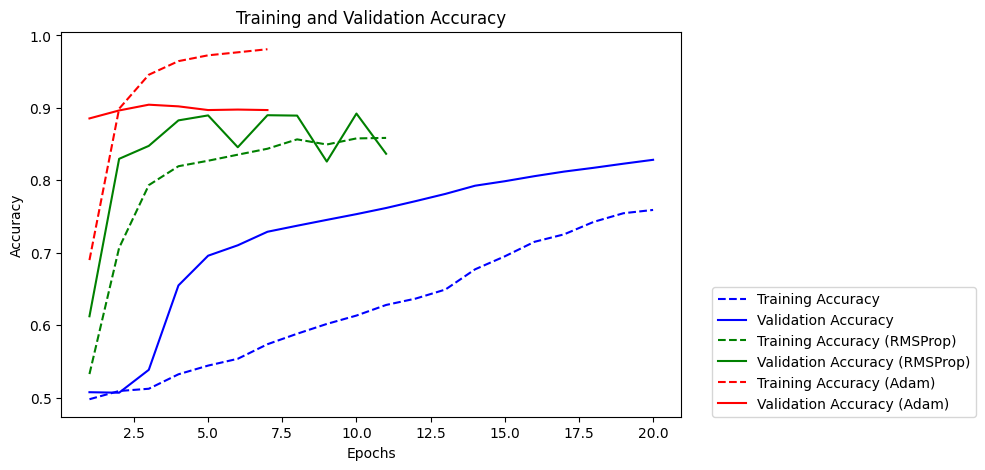

In [ ]:
##---------Type the code below this line------------------##

train_accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]

train_accuracy_rms_prop = history_rms_prop.history["accuracy"]
validation_accuracy_rms_prop = history_rms_prop.history["val_accuracy"]

train_accuracy_adam = history_adam.history["accuracy"]
validation_accuracy_adam = history_adam.history["val_accuracy"]


plt.figure(figsize=(8, 5), dpi=100)

# Use different colors and styles for each model
# Use dashed lines for training accuracy and solid lines for validation accuracy
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, "b--", label="Training Accuracy")
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, "b", label="Validation Accuracy")

plt.plot(
    range(1, len(train_accuracy_rms_prop) + 1), train_accuracy_rms_prop, "g--", label="Training Accuracy (RMSProp)"
)
plt.plot(
    range(1, len(validation_accuracy_rms_prop) + 1),
    validation_accuracy_rms_prop,
    "g",
    label="Validation Accuracy (RMSProp)",
)

plt.plot(
    range(1, len(train_accuracy_adam) + 1),
    train_accuracy_adam,
    "r--",
    label="Training Accuracy (Adam)",
)
plt.plot(
    range(1, len(validation_accuracy_adam) + 1),
    validation_accuracy_adam,
    "r",
    label="Validation Accuracy (Adam)",
)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend(loc=(1.05, 0))
plt.title("Training and Validation Accuracy")

plt.show()

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


**Conclusion:**

- From the first comparison it is clear that the base model is complex and a simple model with one less layer performs better.
- The dropout ratio of 0.25 with L2 regularization / just dropout of 0.25performed better than the base model. Possibly the higher value of dropout ratio in the base model is causing the model to underfit.
- The base model with SGD was effective, but Adam showed faster convergence.
- From this we should try to use Adam with a lower learning rate to converge faster for the first few iterations and then switch to SGD for fine-tuning the model.
- The model architecture should be simplified and the dropout ratio should be reduced to 0.25 with L2 regularization to improve performance.


In [154]:
##---------Type the code below this line------------------##

model_final = tf_keras.Sequential(
    [
        # hub layer raises an error due to backward compatibility: https://github.com/tensorflow/tensorflow/issues/63085#issuecomment-2303851416
        # The tensorflow and keras library versions were downgraded because of this.
        # The second option is to use Lambda layer wrapper around hub layer
        # but that stops showing params and output shape in summary
        tf_hub.KerasLayer(
            "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2",
            trainable=True,
            input_shape=[],
            dtype=tf.string,
            name="embedding",
        ),
        tf_keras.layers.Dense(
            32,
            activation=tf_keras.activations.relu,
            kernel_regularizer=tf_keras.regularizers.l2(0.0001),
            name="hidden_1",
        ),
        tf_keras.layers.Dropout(
            0.25,
            name="dropout_1",
        ),
        tf_keras.layers.Dense(
            1,
            activation=tf_keras.activations.sigmoid,
            name="output",
        ),
    ],
)

model_final.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (KerasLayer)      (None, 128)               124642688 
                                                                 
 hidden_1 (Dense)            (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 124646849 (475.49 MB)
Trainable params: 124646849 (475.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [155]:
model_final.compile(
    optimizer=tf_keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=True),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=["accuracy"],
)

# Early stop
early_stopping = tf_keras.callbacks.EarlyStopping(
    # Maximum time it is allowed val_loss to be deteriorated
    patience=4,
    # used to restore the model weights from the best value observed epoch
    restore_best_weights=True,
)


history_final_1 = model_final.fit(
    X_train,
    y_train,
    validation_data=(X_validation, y_validation),
    epochs=20,
    batch_size=1000,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/20
35/35 [==============================] - 24s 609ms/step - loss: 0.6144 - accuracy: 0.6836 - val_loss: 0.4761 - val_accuracy: 0.8252
Epoch 2/20
35/35 [==============================] - 17s 498ms/step - loss: 0.3790 - accuracy: 0.8596 - val_loss: 0.3028 - val_accuracy: 0.8888
Epoch 3/20
35/35 [==============================] - 17s 488ms/step - loss: 0.2383 - accuracy: 0.9131 - val_loss: 0.2523 - val_accuracy: 0.9048
Epoch 4/20
35/35 [==============================] - 19s 548ms/step - loss: 0.1656 - accuracy: 0.9447 - val_loss: 0.2390 - val_accuracy: 0.9087
Epoch 5/20
35/35 [==============================] - 19s 538ms/step - loss: 0.1190 - accuracy: 0.9657 - val_loss: 0.2403 - val_accuracy: 0.9092
Epoch 6/20
35/35 [==============================] - 19s 557ms/step - loss: 0.0842 - accuracy: 0.9794 - val_loss: 0.2520 - val_accuracy: 0.9082
Epoch 7/20
35/35 [==============================] - 18s 516ms/step - loss: 0.0604 - accuracy: 0.9879 - val_loss: 0.2727 - val_accuracy: 0.9048

In [157]:
model_final.compile(
    optimizer=tf_keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=["accuracy"],
)

# Early stop
early_stopping = tf_keras.callbacks.EarlyStopping(
    # Maximum time it is allowed val_loss to be deteriorated
    patience=4,
    # used to restore the model weights from the best value observed epoch
    restore_best_weights=True,
)


history_final_2 = model_final.fit(
    X_train,
    y_train,
    validation_data=(X_validation, y_validation),
    epochs=20,
    batch_size=500,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/20
70/70 [==============================] - 18s 250ms/step - loss: 0.1237 - accuracy: 0.9653 - val_loss: 0.2377 - val_accuracy: 0.9094
Epoch 2/20
70/70 [==============================] - 17s 240ms/step - loss: 0.1225 - accuracy: 0.9640 - val_loss: 0.2379 - val_accuracy: 0.9083
Epoch 3/20
70/70 [==============================] - 17s 242ms/step - loss: 0.1213 - accuracy: 0.9630 - val_loss: 0.2383 - val_accuracy: 0.9083
Epoch 4/20
70/70 [==============================] - 17s 238ms/step - loss: 0.1204 - accuracy: 0.9639 - val_loss: 0.2388 - val_accuracy: 0.9084
Epoch 5/20
70/70 [==============================] - 18s 260ms/step - loss: 0.1190 - accuracy: 0.9649 - val_loss: 0.2397 - val_accuracy: 0.9091


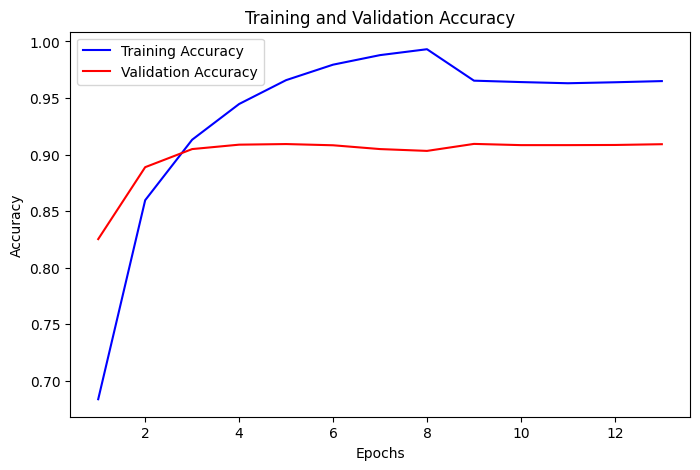

In [158]:
train_accuracy_final = [*history_final_1.history["accuracy"], *history_final_2.history["accuracy"]]
validation_accuracy_final = [*history_final_1.history["val_accuracy"], *history_final_2.history["val_accuracy"]]


plt.figure(figsize=(8, 5), dpi=100)
plt.plot(range(1, len(train_accuracy_final) + 1), train_accuracy_final, label="Training Accuracy", color="b")
plt.plot(
    range(1, len(validation_accuracy_final) + 1), validation_accuracy_final, label="Validation Accuracy", color="r"
)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.title("Training and Validation Accuracy")

plt.show()

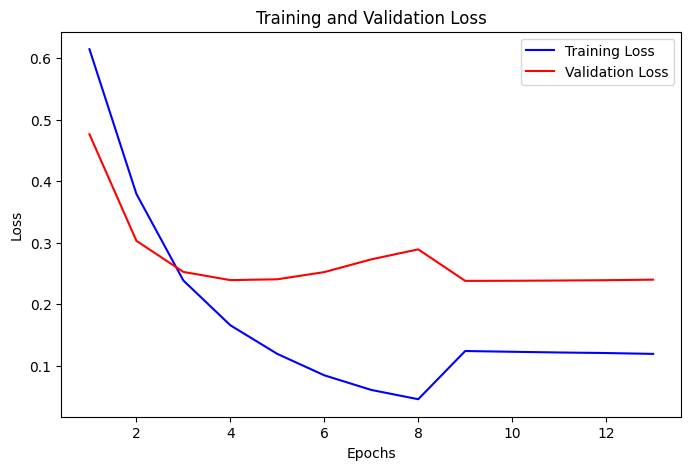

In [159]:
train_loss_final = [*history_final_1.history["loss"], *history_final_2.history["loss"]]
validation_loss_final = [*history_final_1.history["val_loss"], *history_final_2.history["val_loss"]]

plt.figure(figsize=(8, 5), dpi=100)
plt.plot(range(1, len(train_loss_final) + 1), train_loss_final, label="Training Loss", color="b")
plt.plot(range(1, len(validation_loss_final) + 1), validation_loss_final, label="Validation Loss", color="r")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.title("Training and Validation Loss")

plt.show()

In [160]:
loss, accuracy = model_final.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Test Loss: 0.2466, Test Accuracy: 0.9035


233/233 [==============================] - 12s 53ms/step


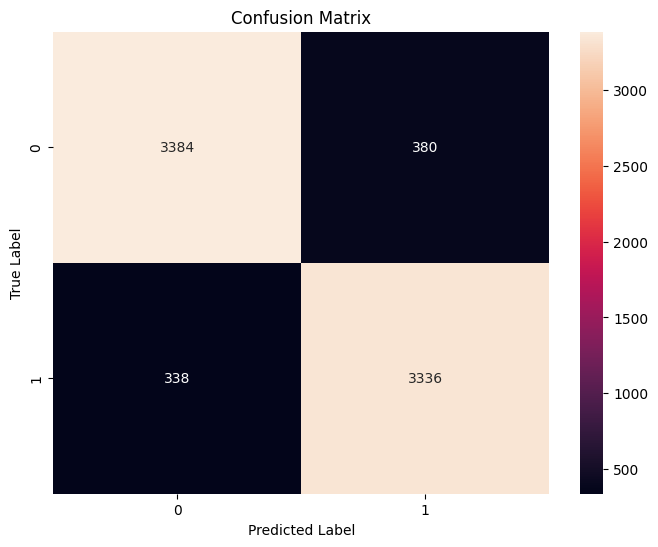

In [161]:
y_prob = model_final.predict(X_test).flatten()
y_pred = (y_prob > 0.5).astype(int)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(8, 6), dpi=100)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

In [164]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1_score_ = f1_score(y_true=y_test, y_pred=y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score_:.4f}")

Accuracy: 0.9035
Precision: 0.8977
Recall: 0.9080
F1 Score: 0.9028


### NOTE

All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck
